# Summer of Code - Artificial Intelligence
## Week 08: Deep Learning

### Day 02: Artificial Neural Networks

In this notebook, we will explore **Artificial Neural Networks (ANNs)** using PyTorch library.

# Deep Learning
Deep Learning is a subset of Machine Learning that focuses on using neural networks to model and understand complex patterns in data.

# Artificial Neuron
An artificial neuron is a computational model inspired by the biological neurons in the human brain. It takes multiple inputs, processes them, and produces an output based on a weighted sum and an activation function.

<img src="neuron.png" alt="Artificial Neuron" width="420"/>

Mathematically, an artificial neuron can be represented as:
$$
\text{output} = \phi \left(\sum_{i=1}^{n} (\text{weight}_i \cdot \text{input}_i) + \text{bias}\right)
$$
Where:
- $\text{input}_i$: The inputs to the neuron.
- $\text{weight}_i$: The weights associated with each input.
- $\text{bias}$: A bias term that helps shift the activation function.
- $\phi$: A non-linear function that determines the output of the neuron.

In [2]:
import numpy as np


def step(x):
    # if x > 0:
    #     return 1
    # else:
    #     return -1

    return np.where(x > 0, 1, -1)


def sigmoid(x):
    return 1/(1 + np.exp(-x))


def relu(x):
    # return x if x > 0 else 0
    return np.maximum(0, x)

In [3]:
def neuron(inputs, weights, bias, activation):
    output = np.dot(inputs, weights) + bias
    return activation(output)

In [6]:
setosa1 = [0.5, 0.3, 0.6, 0.7]

weights = [0.4, 0.6, 0.2, 0.8]

bias = -0.5

neuron(setosa1, weights, bias, sigmoid)

np.float64(0.6364525402815664)

In [8]:
X = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0]
])

y = np.array([0, 0, 0, 1])  # AND gate

weights = np.array([1.0, 1.0])

bias = -1.5

neuron(X, weights, bias, sigmoid)  # 0 AND 0 = 0

array([0.18242552, 0.37754067, 0.37754067, 0.62245933])

# Pytorch
It is an open-source machine learning library developed by Facebook's AI Research lab. It provides a flexible and efficient way to build and train deep learning models. 

In [10]:
import torch
from torch import nn

In [42]:
perceptron = nn.Linear(2, 3)
perceptron.weight, perceptron.bias

(Parameter containing:
 tensor([[ 0.0788, -0.3318],
         [-0.4247, -0.5508],
         [ 0.0739,  0.2762]], requires_grad=True),
 Parameter containing:
 tensor([-0.5389, -0.3377, -0.6484], requires_grad=True))

# Multilayer Perceptron (MLP)
A Multilayer Perceptron (MLP) is a type of artificial neural network that consists of multiple layers of neurons, including an input layer, one or more hidden layers, and an output layer. Each neuron in one layer is connected to every neuron in the next layer.

<img src="mlp.png" alt="Multilayer Perceptron" width="500"/>

In [49]:
X = np.arange(20).reshape(5, 4).astype(np.float32)
X

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.]], dtype=float32)

In [50]:
mlp = nn.Sequential(
    nn.Linear(4, 3), # Layer 1
    nn.ReLU(),
    nn.Linear(3, 2), # Layer 2
    nn.ReLU(),
    nn.Linear(2, 3) # Layer 3, (output)
)

In [51]:
list(mlp.children())

[Linear(in_features=4, out_features=3, bias=True),
 ReLU(),
 Linear(in_features=3, out_features=2, bias=True),
 ReLU(),
 Linear(in_features=2, out_features=3, bias=True)]

In [68]:
mlp(torch.tensor(X))

tensor([[-0.4377,  0.3063, -0.0048],
        [-0.4295,  0.3803, -0.0914],
        [-0.4238,  0.4325, -0.1526],
        [-0.4181,  0.4848, -0.2138],
        [-0.4123,  0.5371, -0.2749]], grad_fn=<AddmmBackward0>)

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(4, 3)
        self.layer2 = nn.Linear(3, 2)
        self.output_layer = nn.Linear(2, 3)
        self.activation = nn.ReLU()
    
    def forward(self, x):
        print("Forwad Pass")
        output = self.layer1(x)
        output = self.activation(output)
        output = self.layer2(output)
        output = self.activation(output)
        output = self.output_layer(output)
        return output

model = MLP()
model

MLP(
  (layer1): Linear(in_features=4, out_features=3, bias=True)
  (layer2): Linear(in_features=3, out_features=2, bias=True)
  (output_layer): Linear(in_features=2, out_features=3, bias=True)
  (activation): ReLU()
)

In [72]:
model(torch.tensor(X))

Forwad Pass


tensor([[ 0.3018, -0.0499, -0.1844],
        [ 0.3018, -0.0499, -0.1844],
        [ 0.3018, -0.0499, -0.1844],
        [ 0.3018, -0.0499, -0.1844],
        [ 0.3018, -0.0499, -0.1844]], grad_fn=<AddmmBackward0>)

In [75]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0418, -0.1770, -0.2522, -0.0289],
         [ 0.1165, -0.0187, -0.4141,  0.2237],
         [ 0.0743,  0.0621, -0.1857,  0.0110]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4445, -0.0212,  0.2046], requires_grad=True),
 Parameter containing:
 tensor([[ 0.4330,  0.4797,  0.0369],
         [ 0.2127, -0.5427, -0.3802]], requires_grad=True),
 Parameter containing:
 tensor([0.2495, 0.4545], requires_grad=True),
 Parameter containing:
 tensor([[-0.3983, -0.2311],
         [-0.2511,  0.2184],
         [ 0.5772,  0.2272]], requires_grad=True),
 Parameter containing:
 tensor([ 0.5062, -0.0865, -0.4317], requires_grad=True)]

# How do you train an MLP?
Training an MLP involves the following steps:
1. **Forward Pass**: Input data is passed through the network to obtain predictions.
2. **Loss Calculation**: The difference between the predicted output and the actual target values is calculated using a loss function.
3. **Backward Pass**: The gradients of the loss with respect to the model parameters are computed using backpropagation.
4. **Parameter Update**: The model parameters (weights and biases) are updated using an optimization algorithm (e.g., Stochastic Gradient Descent, Adam) to minimize the loss.

## Backpropagation
Backpropagation is an algorithm used to train neural networks by calculating the gradients of the loss function with respect to each weight in the network.

<img src="simplified_mlp.png" alt="Backpropagation" width="600"/>
<br />
<img src="backpropagation.png" alt="Backpropagation Algorithm" width="600"/>

# Fashion MNIST Dataset
The Fashion MNIST dataset is a collection of 70,000 grayscale images of 28x28 pixels, each representing a different clothing item.

In [76]:
from torchvision import datasets

fashion_mnist_train = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=None
)
fashion_mnist_test = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=None
)

fashion_mnist_train, fashion_mnist_test

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train,
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test)

In [78]:
classes = fashion_mnist_train.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [79]:
fashion_mnist_train.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [81]:
fashion_mnist_train[1]

(<PIL.Image.Image image mode=L size=28x28>, 0)

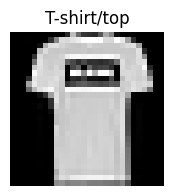

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(fashion_mnist_train[1][0], cmap='gray')
plt.title(f"{classes[fashion_mnist_train[1][1]]}")
plt.axis('off')
plt.show()

# Training a Feedforward Neural Network on Cifar10 Dataset

In [99]:
from torch.utils.data import DataLoader
from torchvision import transforms


train_transform = transforms.Compose([
    transforms.ToTensor()
])

fashion_mnist_train.transform = train_transform
fashion_mnist_test.transform = train_transform


train_loader = DataLoader(
    dataset=fashion_mnist_train,
    batch_size=64,
    shuffle=True,
    num_workers=2
)

test_loader = DataLoader(
    dataset=fashion_mnist_test,
    batch_size=64,
    shuffle=False,
    num_workers=2
)


len(train_loader), len(test_loader)

(938, 157)

In [ ]:
class FeedForwardNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(28*28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.output_layer = nn.Linear(64, 10)
        self.activation = nn.ReLU()
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        x = self.activation(x)
        x = self.output_layer(x)
        return x

model = FeedForwardNN()

In [95]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

FeedForwardNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=10, bias=True)
  (activation): ReLU()
)

In [101]:
epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    for batch in train_loader:
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")


Epoch 1/5, Loss: 0.44620180130004883
Epoch 2/5, Loss: 0.2224666327238083
Epoch 3/5, Loss: 0.270537793636322
Epoch 4/5, Loss: 0.4288010895252228
Epoch 5/5, Loss: 0.19754762947559357
